In [1]:
import pandas as pd
import numpy as np

In [2]:
fire_bkk = pd.read_csv("../../data/a1/bkk_firemap.csv")

In [3]:
fire_bkk

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,acq_datetime,distance_km
0,14.06136,100.42788,336.18,0.64,0.72,2018-04-02,725,N20,VIIRS,n,2,287.04,5.83,D,0,2018-04-02 07:25:00,38.507357
1,13.83529,100.23379,334.80,0.59,0.53,2018-04-03,706,N20,VIIRS,n,2,292.14,4.35,D,0,2018-04-03 07:06:00,33.551298
2,13.87908,100.35175,334.48,0.60,0.53,2018-04-03,706,N20,VIIRS,n,2,293.33,4.22,D,0,2018-04-03 07:06:00,25.081270
3,13.99993,100.30132,331.71,0.60,0.53,2018-04-03,706,N20,VIIRS,n,2,292.33,7.84,D,0,2018-04-03 07:06:00,38.646243
4,14.02849,100.57300,333.19,0.48,0.40,2018-04-04,647,N20,VIIRS,n,2,295.92,3.62,D,0,2018-04-04 06:47:00,33.838438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4173,14.07704,100.64485,336.02,0.45,0.39,2024-11-30,620,N20,VIIRS,n,2,297.28,3.46,D,2,2024-11-30 06:20:00,40.951636
4174,14.07771,100.64893,344.79,0.45,0.39,2024-11-30,620,N20,VIIRS,n,2,297.89,3.46,D,2,2024-11-30 06:20:00,41.164273
4175,13.70230,100.61863,335.27,0.45,0.39,2024-11-30,620,N20,VIIRS,n,2,300.80,2.94,D,0,2024-11-30 06:20:00,10.598307
4176,13.76492,100.90894,333.81,0.44,0.38,2024-11-30,620,N20,VIIRS,n,2,298.01,4.56,D,0,2024-11-30 06:20:00,41.767406


Text(0.5, 1.0, 'Correlation Heatmap of Fire Data')

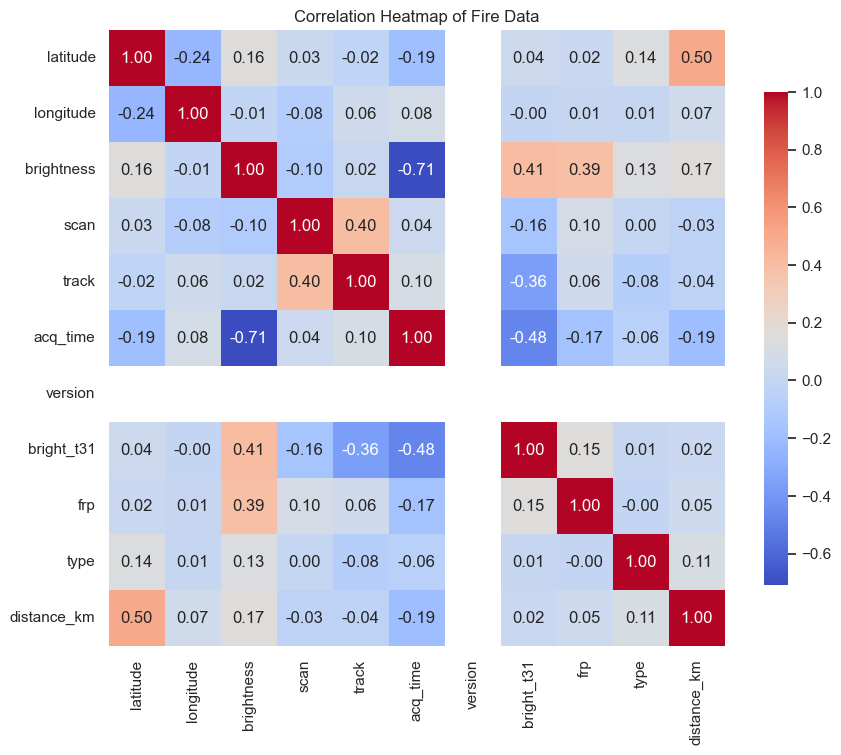

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", palette="muted")
sns.set_context("notebook")
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation
numeric_cols = fire_bkk.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap of Fire Data")

In [5]:
lat_lon = fire_bkk[["latitude", "longitude"]].drop_duplicates()
lat_lon

,latitude,longitude
0,14.06136,100.42788
1,13.83529,100.23379
2,13.87908,100.35175
3,13.99993,100.30132
4,14.02849,100.57300
...,...,...
4173,14.07704,100.64485
4174,14.07771,100.64893
4175,13.70230,100.61863
4176,13.76492,100.90894


In [6]:
use_df = fire_bkk[["acq_date", "brightness", "bright_t31"]]
use_df

,acq_date,brightness,bright_t31
0,2018-04-02,336.18,287.04
1,2018-04-03,334.80,292.14
2,2018-04-03,334.48,293.33
3,2018-04-03,331.71,292.33
4,2018-04-04,333.19,295.92
...,...,...,...
4173,2024-11-30,336.02,297.28
4174,2024-11-30,344.79,297.89
4175,2024-11-30,335.27,300.80
4176,2024-11-30,333.81,298.01


C:\Users\poyni\AppData\Local\Temp\ipykernel_18448\2365055871.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_df["acq_date"] = pd.to_datetime(use_df["acq_date"])


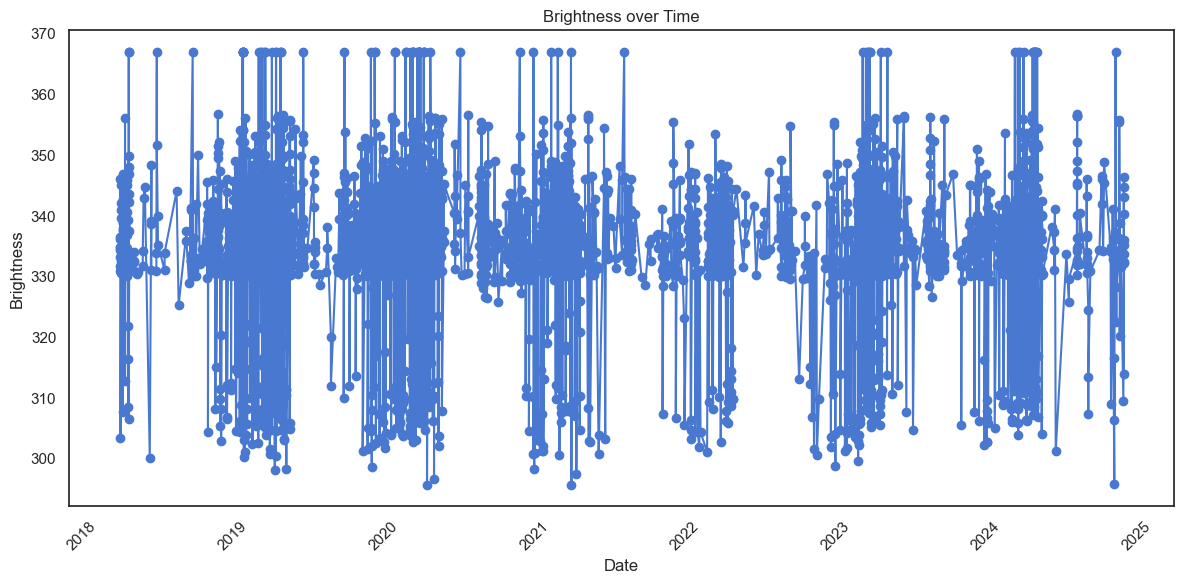

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Make sure the date column is datetime
use_df["acq_date"] = pd.to_datetime(use_df["acq_date"])

plt.figure(figsize=(12, 6))
plt.plot(use_df["acq_date"], use_df["brightness"], marker="o", linestyle="-", color="b")



plt.title("Brightness over Time")
plt.xlabel("Date")
plt.ylabel("Brightness")

# Show ticks only once per year
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())  # one tick per year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # show only year

plt.xticks(rotation=45)  # Optional: makes the year labels readable
plt.tight_layout()
plt.show()

In [8]:
#check day duplicates
duplicates = use_df[use_df.duplicated(subset=["acq_date"], keep=False)]
duplicates.sort_values("acq_date", inplace=True)
duplicates.reset_index(drop=True, inplace=True)
duplicates

C:\Users\poyni\AppData\Local\Temp\ipykernel_18448\3473813375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicates.sort_values("acq_date", inplace=True)


,acq_date,brightness,bright_t31
0,2018-04-03,334.80,292.14
1,2018-04-03,334.48,293.33
2,2018-04-03,331.71,292.33
3,2018-04-04,333.19,295.92
4,2018-04-04,336.61,295.44
...,...,...,...
3871,2024-11-30,346.37,297.24
3872,2024-11-30,332.50,297.80
3873,2024-11-30,332.29,297.64
3874,2024-11-30,340.36,298.22


Text(0, 0.5, 'Brightness')

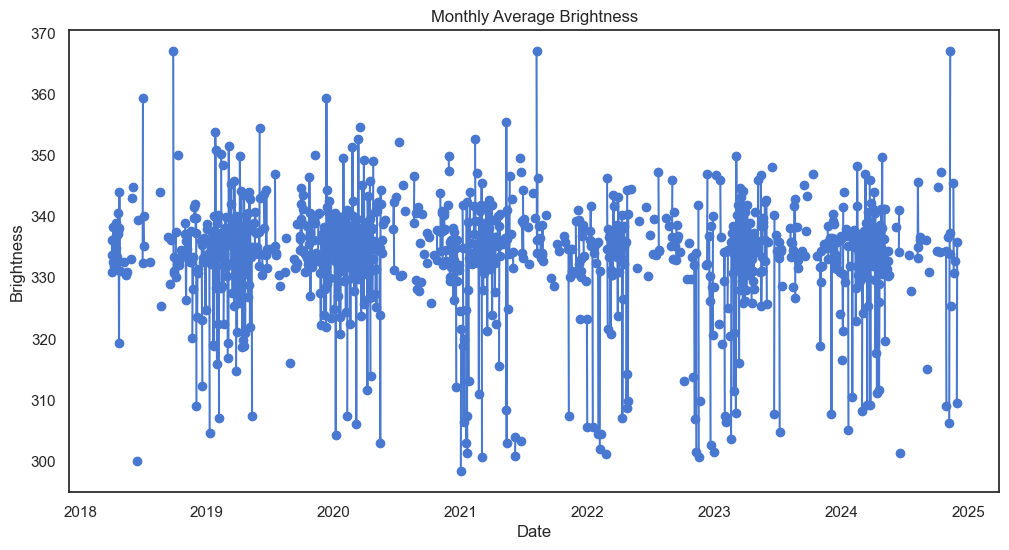

In [9]:
#resample as a monthly average
use_df.set_index("acq_date", inplace=True)
use_df = use_df.resample("D").mean()
use_df.reset_index(inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(use_df["acq_date"], use_df["brightness"], marker="o", linestyle="-", color="b")
plt.title("Monthly Average Brightness")
plt.xlabel("Date")
plt.ylabel("Brightness")

In [10]:
#check day duplicates
duplicates = use_df[use_df.duplicated(subset=["acq_date"], keep=False)]
duplicates.sort_values("acq_date", inplace=True)
duplicates.reset_index(drop=True, inplace=True)
duplicates

C:\Users\poyni\AppData\Local\Temp\ipykernel_18448\3473813375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicates.sort_values("acq_date", inplace=True)


,acq_date,brightness,bright_t31


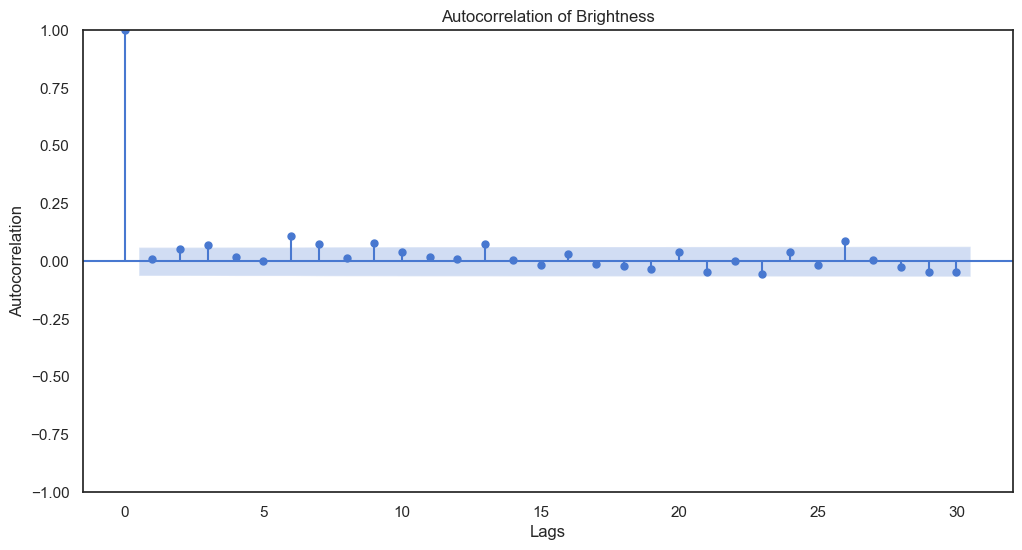

In [11]:
# autocorrelation plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

plt.figure(figsize=(12, 6))
plot_acf(use_df["brightness"].dropna(), lags=30, ax=plt.gca())
plt.title("Autocorrelation of Brightness")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()

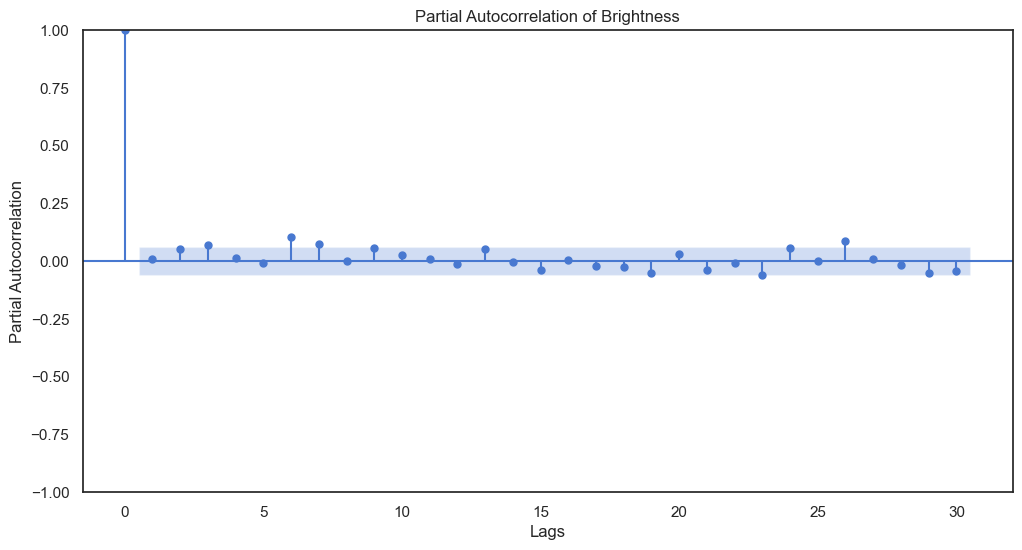

In [12]:
# plot PACF
#plot ACF

plt.figure(figsize=(12, 6))
plot_pacf(use_df["brightness"].dropna(), lags=30, ax=plt.gca())
plt.title("Partial Autocorrelation of Brightness")
plt.xlabel("Lags")
plt.ylabel("Partial Autocorrelation")
plt.show()

Testing Differencing Order: d = 0
Augmented Dickey-Fuller Test: 
ADF Statistic          -9.595130e+00
p-value                 1.987723e-16
# Lags Used             6.000000e+00
# Observations Used     1.015000e+03
Critical Value (1%)    -3.436809e+00
Critical Value (5%)    -2.864392e+00
Critical Value (10%)   -2.568288e+00
----------------------------------------
KPSS Test:
Statistic: 0.5314256147524735, p-value: 0.034588825506199655, lags: 8
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
----------------------------------------
Testing Differencing Order: d = 1
Augmented Dickey-Fuller Test: 
ADF Statistic          -1.878421e+01
p-value                 2.023977e-30
# Lags Used             2.000000e+00
# Observations Used     6.550000e+02
Critical Value (1%)    -3.440373e+00
Critical Value (5%)    -2.865963e+00
Critical Value (10%)   -2.569125e+00
----------------------------------------
KPSS Test:
Statistic: 0.08617317253917262, p-value: 0.1, lags: 11
Critical 

C:\Users\poyni\AppData\Local\Temp\ipykernel_18448\197854566.py:22: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series.dropna(), **kw)


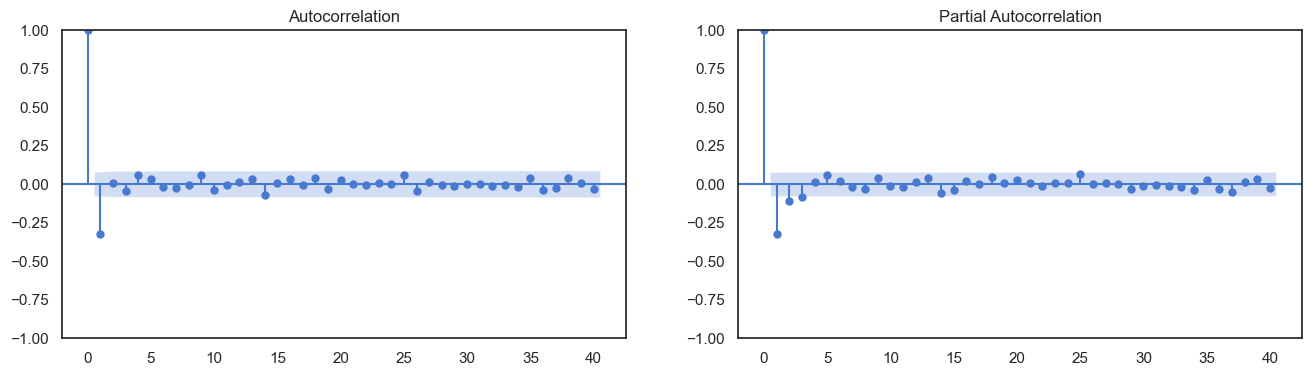

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1. Stationarity test function
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Statistic', 'p-value', '# Lags Used', '# Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, val in result[4].items():
        out[f'Critical Value ({key})'] = val
    print(out.to_string()) 
    print('-'*40)
    return result[1]  # return p-value

# 2. KPSS Test for confirmation
def kpss_test(series, **kw):
    from statsmodels.tsa.stattools import kpss
    statistic, p_value, n_lags, critical_values = kpss(series.dropna(), **kw)
    print(f'KPSS Test:')
    print(f'Statistic: {statistic}, p-value: {p_value}, lags: {n_lags}')
    print(f'Critical Values: {critical_values}')
    print('-'*40)
    return p_value

# 3. ACF and PACF plots
def plot_acf_pacf(series, lags=40):
    fig, axes = plt.subplots(1, 2, figsize=(16,4))
    plot_acf(series.dropna(), ax=axes[0], lags=lags)
    plot_pacf(series.dropna(), ax=axes[1], lags=lags, method='ywm')
    plt.show()

# 4. Differencing loop to find 'd'
def find_d(series, max_d=2):
    d = 0
    while d <= max_d:
        print(f'Testing Differencing Order: d = {d}')
        adf_p = adf_test(series)
        kpss_p = kpss_test(series, regression='c')
        if adf_p < 0.05 and kpss_p > 0.05:
            print(f'Series is stationary at differencing order d = {d}\n')
            return d
        series = series.diff().dropna()
        d += 1
    print('Series is not stationary up to max_d.')
    return None

# Example usage
# Assume `use_df['brightness']` is your time series
series = use_df['brightness']
d = find_d(series)
plot_acf_pacf(series.diff(d).dropna())  # Use differenced series to find p, q

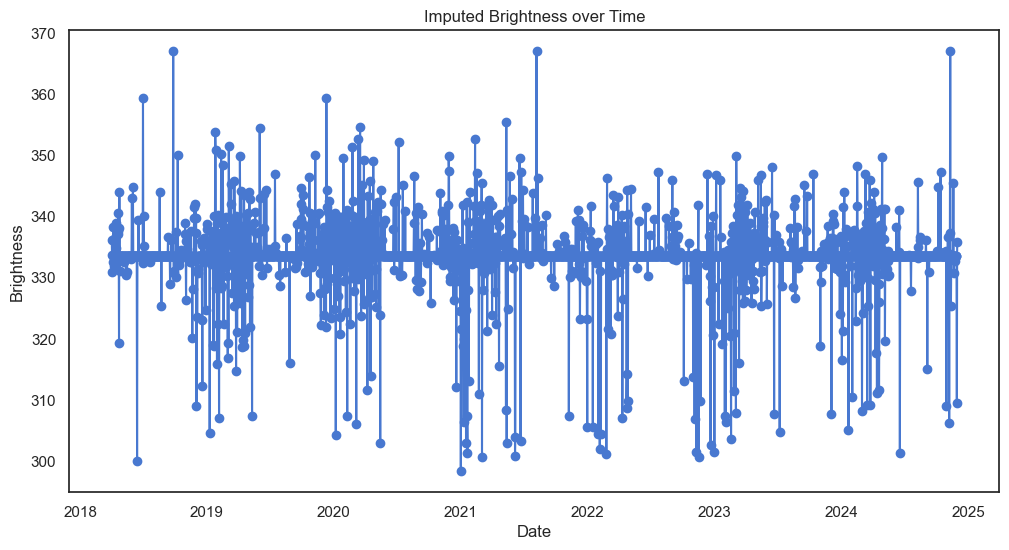

In [14]:
#now impute all data during months with missing data
#use knn imputer
from sklearn.impute import KNNImputer

# Create a KNN imputer object with 3 neighbors
imputer = KNNImputer(n_neighbors=3)
# Fit and transform the data
imputed_data = imputer.fit_transform(use_df[["brightness"]])
# Convert the result back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=["brightness"])
# Add the date column back
imputed_df["acq_date"] = use_df["acq_date"]
# Set the date column as index
imputed_df.set_index("acq_date", inplace=True)
# Plot the imputed data
plt.figure(figsize=(12, 6))
plt.plot(imputed_df.index, imputed_df["brightness"], marker="o", linestyle="-", color="b")
plt.title("Imputed Brightness over Time")
plt.xlabel("Date")
plt.ylabel("Brightness")
plt.show()

<Figure size 1200x600 with 0 Axes>

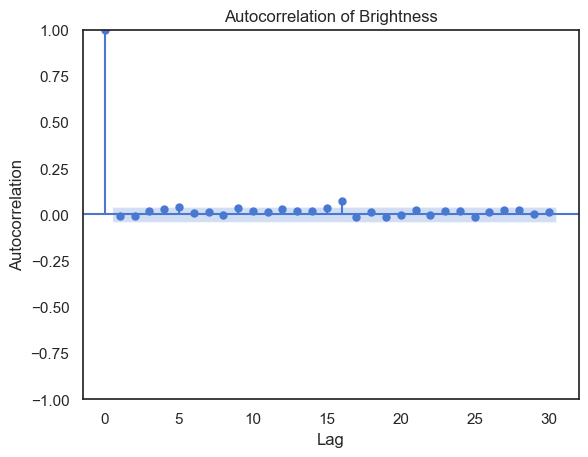

In [15]:
#auto correlation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))
plot_acf(imputed_df["brightness"], lags=30)
plt.title("Autocorrelation of Brightness")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

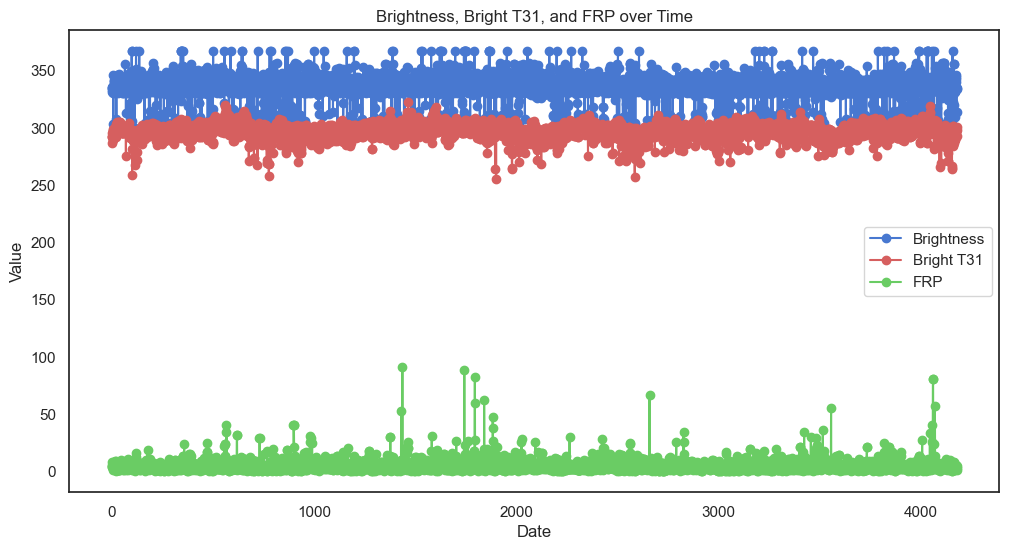

In [16]:
#plot brightness, bright_t31, frp in the same graph where confidence = h
plt.figure(figsize=(12, 6))
plt.plot(fire_bkk["brightness"], marker="o", linestyle="-", color="b", label="Brightness")
plt.plot(fire_bkk["bright_t31"], marker="o", linestyle="-", color="r", label="Bright T31")
plt.plot(fire_bkk["frp"], marker="o", linestyle="-", color="g", label="FRP")
plt.title("Brightness, Bright T31, and FRP over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

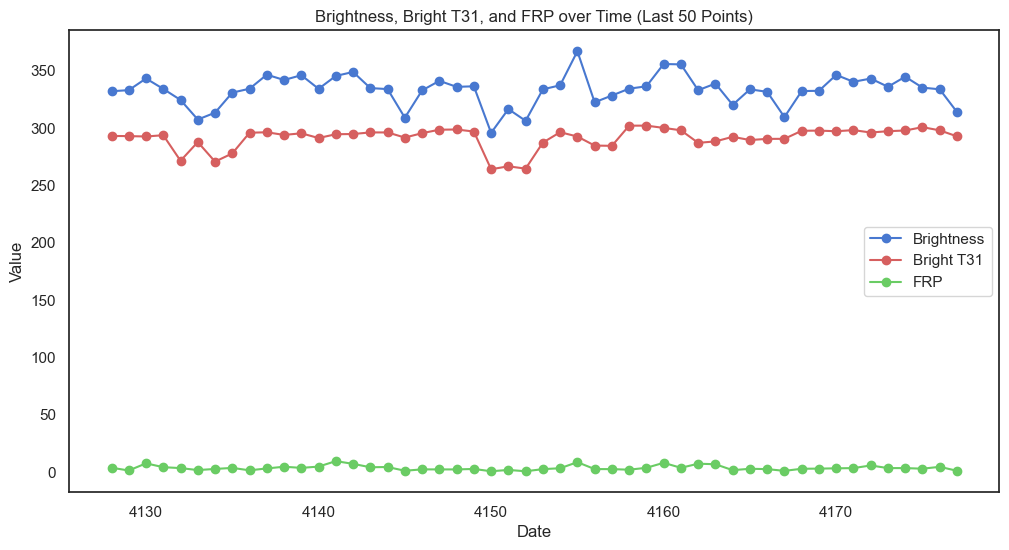

In [17]:
#plot on;y last 50 points
plt.figure(figsize=(12, 6))
plt.plot(fire_bkk["brightness"].tail(50), marker="o", linestyle="-", color="b", label="Brightness")
plt.plot(fire_bkk["bright_t31"].tail(50), marker="o", linestyle="-", color="r", label="Bright T31")
plt.plot(fire_bkk["frp"].tail(50), marker="o", linestyle="-", color="g", label="FRP")
plt.title("Brightness, Bright T31, and FRP over Time (Last 50 Points)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()

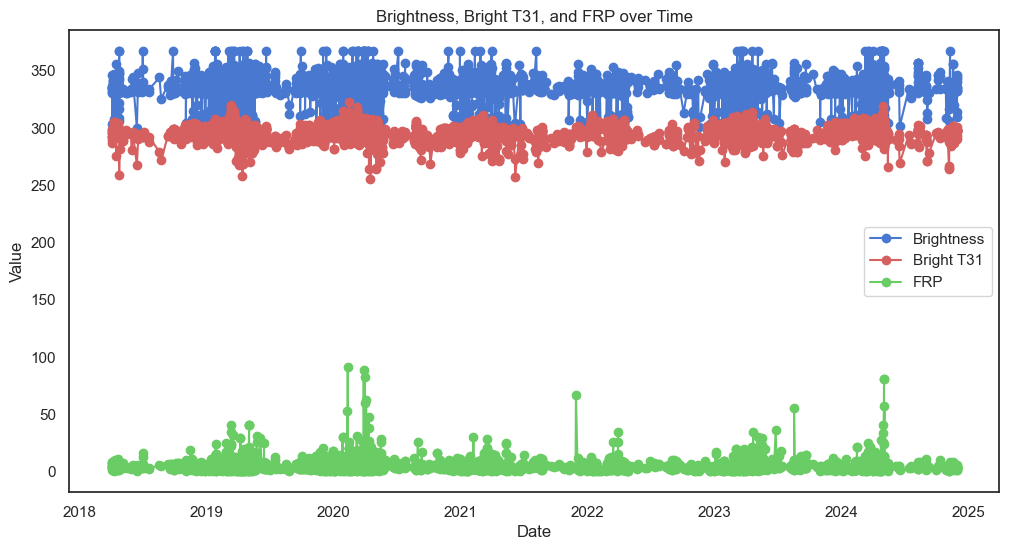

In [18]:
#now use act time as index and plot as time series
fire_bkk["acq_date"] = pd.to_datetime(fire_bkk["acq_date"])
fire_bkk.set_index("acq_date", inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(fire_bkk["brightness"], marker="o", linestyle="-", color="b", label="Brightness")
plt.plot(fire_bkk["bright_t31"], marker="o", linestyle="-", color="r", label="Bright T31")
plt.plot(fire_bkk["frp"], marker="o", linestyle="-", color="g", label="FRP")
plt.title("Brightness, Bright T31, and FRP over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

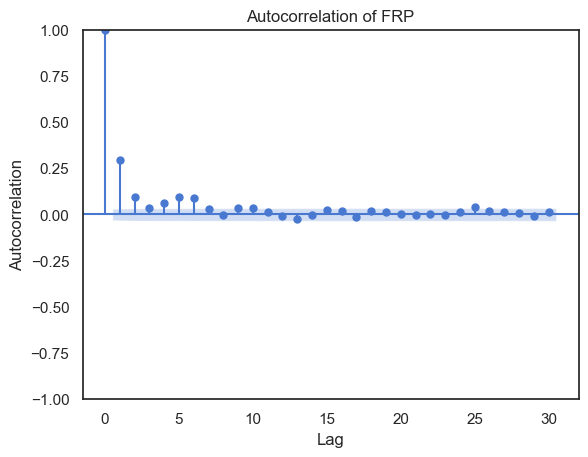

In [19]:
#autocorrelation frp
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))
plot_acf(fire_bkk["frp"].dropna(), lags=30)
plt.title("Autocorrelation of FRP")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

C:\Users\poyni\AppData\Local\Temp\ipykernel_18448\2311280357.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plot_acf(fire_bkk["frp"].resample("M").mean().dropna(), lags=70)


<Figure size 1200x600 with 0 Axes>

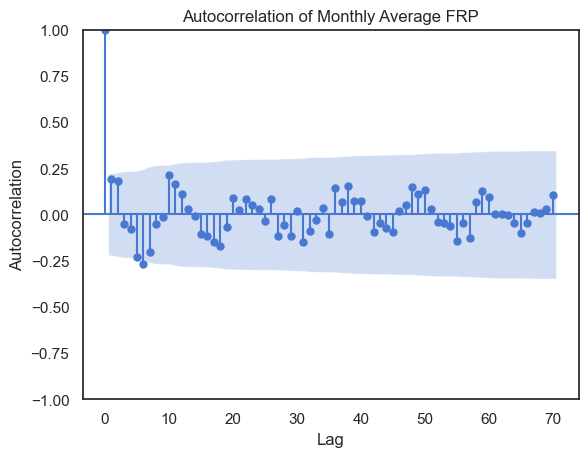

In [24]:
# autocorrelation of frp by month
plt.figure(figsize=(12, 6))
plot_acf(fire_bkk["frp"].resample("M").mean().dropna(), lags=70)
plt.title("Autocorrelation of Monthly Average FRP")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()